<a href="https://colab.research.google.com/github/VarunTej9/Handwritten-Digit-Recognition-using-KNN-with-PCA-Visualization/blob/main/Handwritten_Digit_Recognition_using_KNN_with_PCA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.98


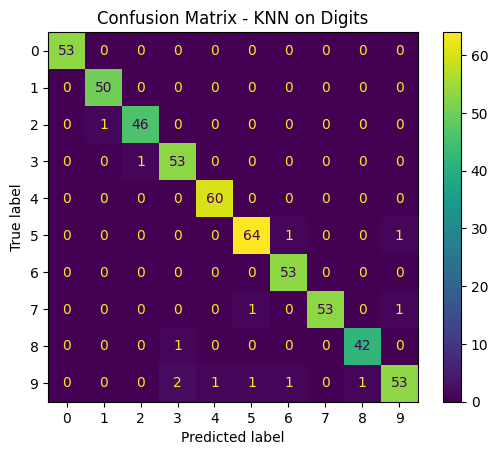

/tmp/ipython-input-1-2355928933.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", 10)
/tmp/ipython-input-1-2355928933.py:65: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


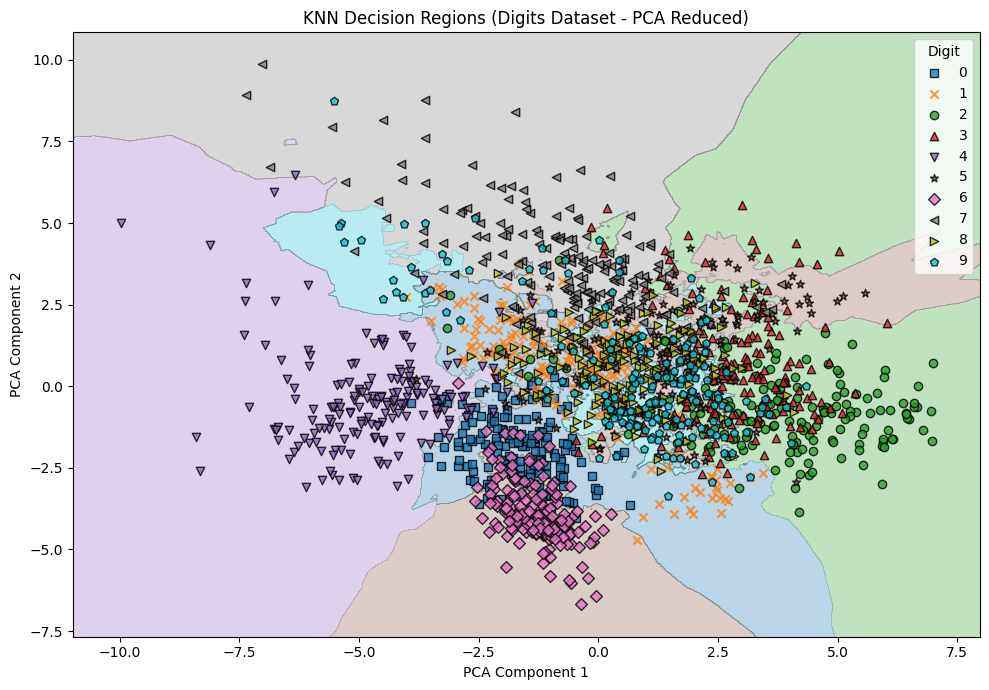

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_std)

# Print Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=np.arange(10))
plt.title("Confusion Matrix - KNN on Digits")
plt.show()

# PCA Visualization (reduce to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sc.fit_transform(X))

# Fit KNN on PCA-transformed data (for visualization only)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca, y)

# Plot decision boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v', '*', 'D', '<', '>', 'p')
    colors = plt.cm.tab10.colors
    cmap = plt.cm.get_cmap("tab10", 10)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=[colors[idx]],
                    marker=markers[idx],
                    label=str(cl),
                    edgecolor='black')

# Plot PCA decision boundaries
plt.figure(figsize=(10, 7))
plot_decision_regions(X_pca, y, classifier=knn_pca)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Regions (Digits Dataset - PCA Reduced)")
plt.legend(title="Digit")
plt.tight_layout()
plt.show()
